In [516]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [517]:
data = pd.read_csv('positions_salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [518]:
x = data.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [519]:
y = data.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

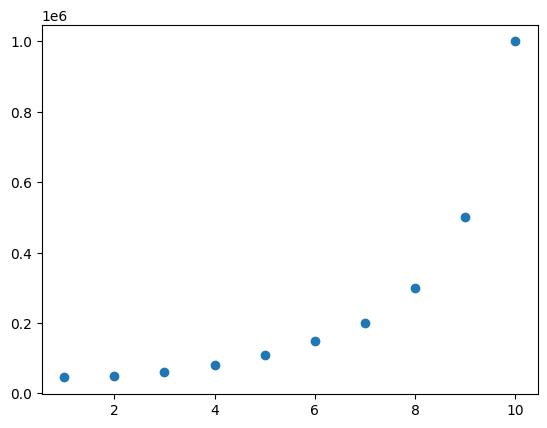

In [520]:
plt.scatter(x,y)

KeyboardInterrupt: 

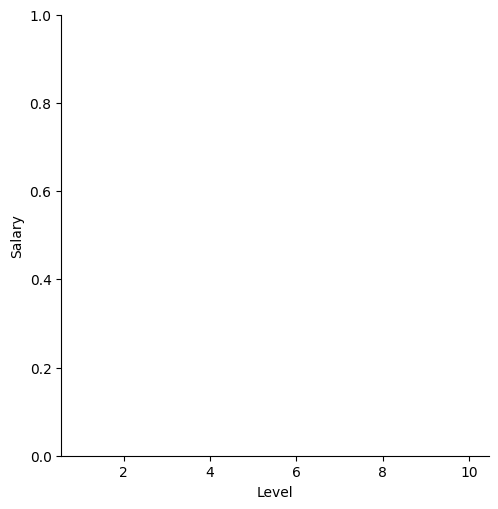

In [521]:
sns.lmplot(x='Level',y='Salary',data=data, order=20,ci=None)

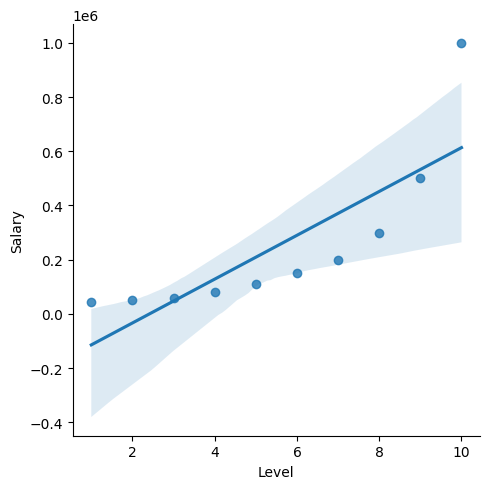

In [507]:
sns.lmplot(x='Level',y='Salary',data=data)

In [508]:
# let train this model using linear regression model 
from sklearn import linear_model

In [509]:
reg_linear = linear_model.LinearRegression()

In [510]:
reg_linear.fit(x,y)

LinearRegression()

In [511]:
reg_linear.predict([[6.5]])
# but you can see the output is shit 

array([330378.78787879])

In [512]:
from sklearn.preprocessing import PolynomialFeatures

In [513]:
poly = PolynomialFeatures(degree=2)

In [514]:
x_poly = poly.fit_transform(x)

In [515]:
reg_polynomial = linear_model.LinearRegression(random_state=42)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'random_state'

In [461]:
reg_polynomial.fit(x_poly,y)

LinearRegression()

In [462]:
reg_polynomial.predict(poly.fit_transform([[7]]))
# little bit model accuracy is increased 

array([254227.27272727])

In [463]:
from sklearn.model_selection  import train_test_split

In [464]:
x_train,x_test,y_train,y_test = train_test_split(data[['Level']],data['Salary'] ,test_size=0.2,random_state=42)

In [465]:
x_train

,Level
4,5
0,1
2,3
7,8
8,9
5,6
3,4
1,2


In [466]:
y_train

4    110000
0     45000
2     60000
7    300000
8    500000
5    150000
3     80000
1     50000
Name: Salary, dtype: int64

In [467]:
x_test

,Level
6,7
9,10


In [468]:
y_test

6     200000
9    1000000
Name: Salary, dtype: int64

In [469]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [470]:
reg_polynomial.score(x_test_poly,y_test)

0.9173093685433888